In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
df = pd.read_csv('winequality-red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:ylabel='Count'>

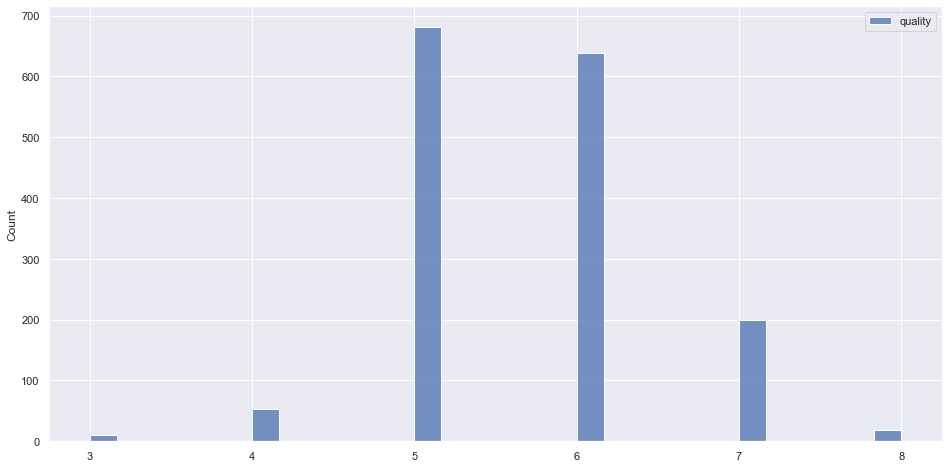

In [11]:
quality = pd.DataFrame(df['quality'])

f = plt.figure(figsize=(16, 8))
sb.histplot(data = quality)

# Correlation - to check variables affecting the quality of wine

<AxesSubplot:>

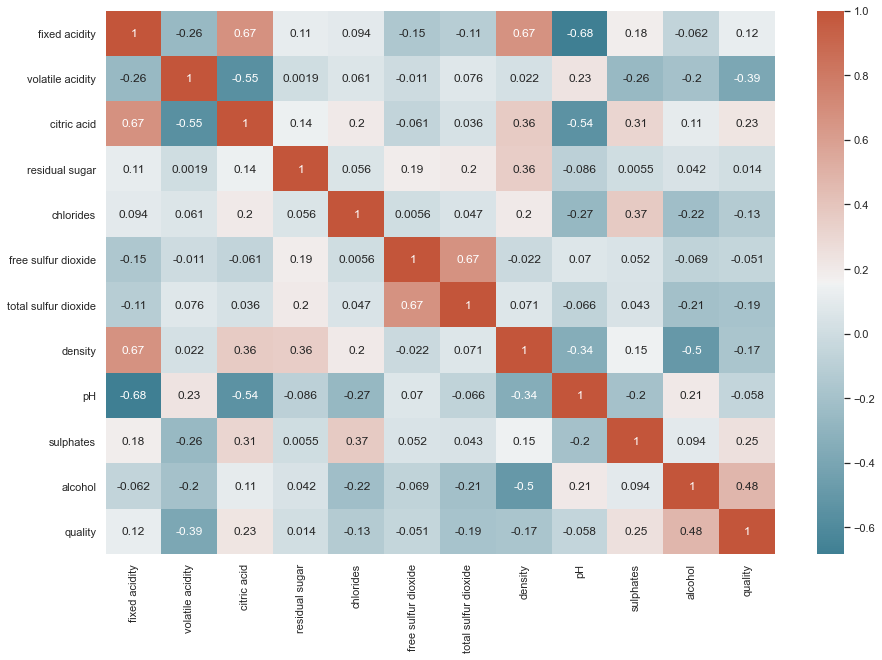

In [14]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True))

# Plot boxplot to check quality against every other variable

In [20]:
others = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

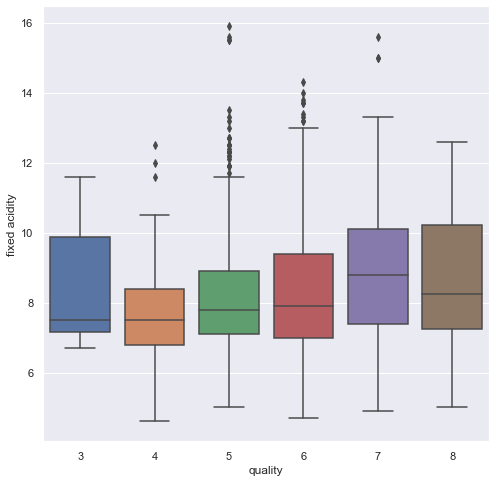

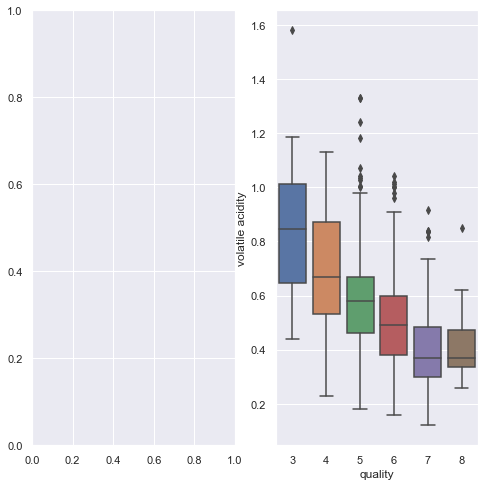

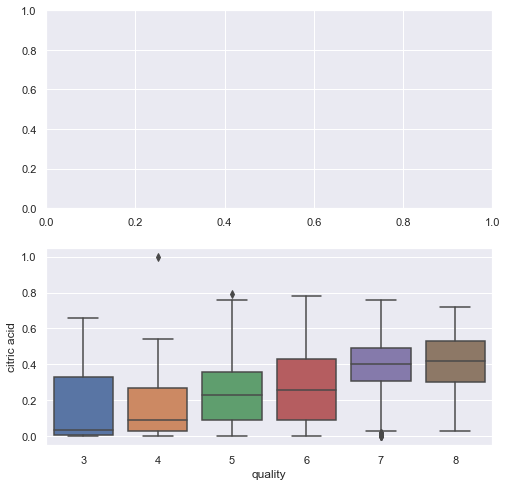

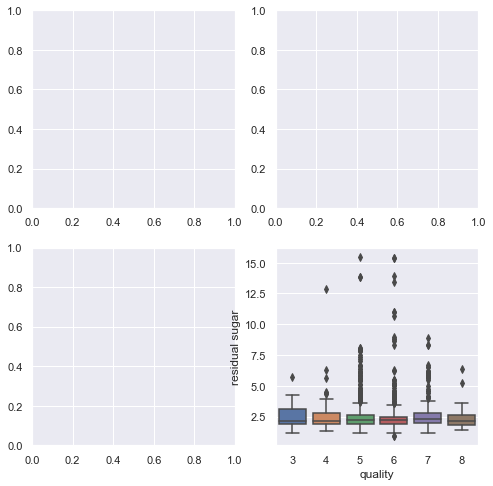

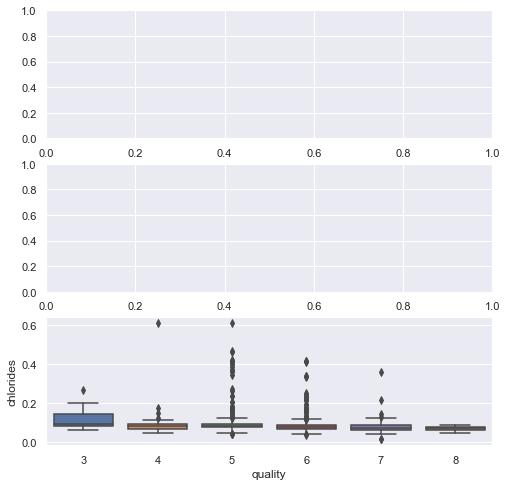

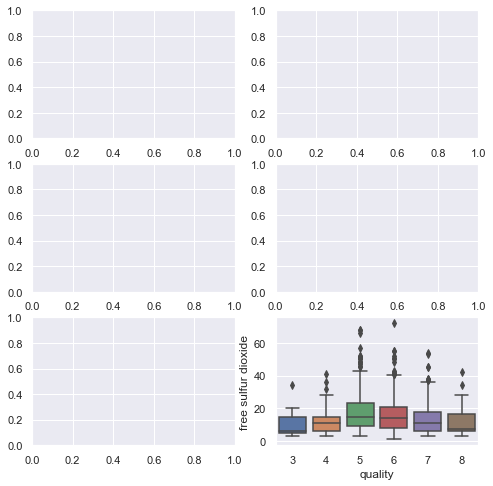

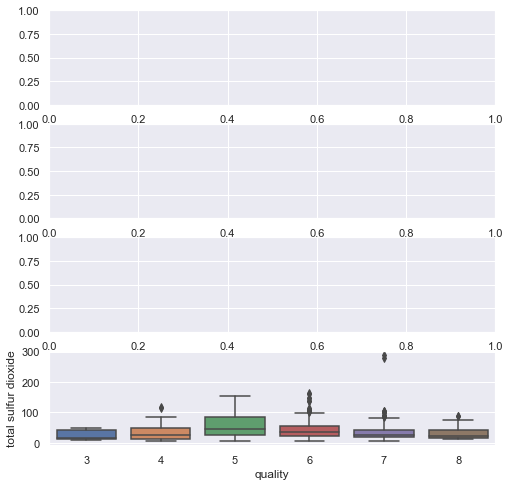

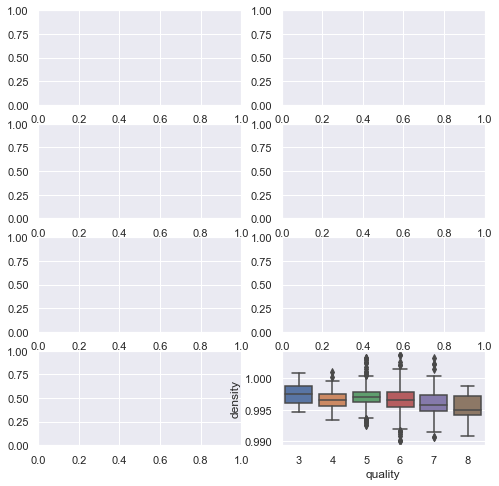

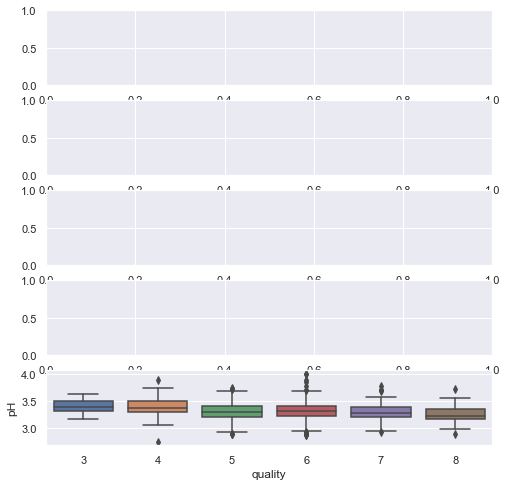

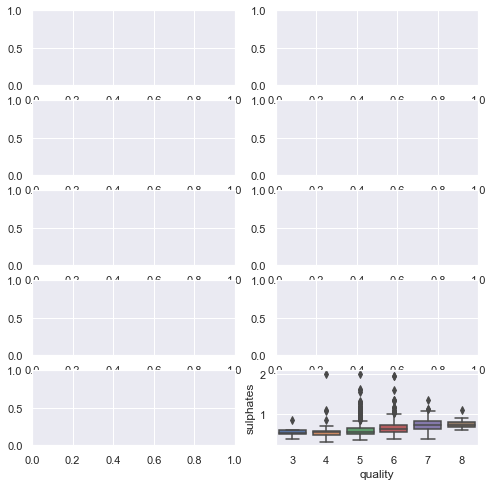

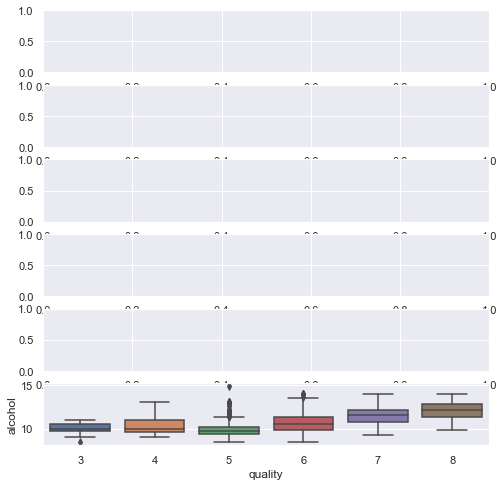

In [34]:
f, axes = plt.subplots(1, 1, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'fixed acidity', data = df)

f, axes = plt.subplots(1, 2, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'volatile acidity', data = df)

f, axes = plt.subplots(2, 1, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'citric acid', data = df)

f, axes = plt.subplots(2, 2, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'residual sugar', data = df)

f, axes = plt.subplots(3, 1, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'chlorides', data = df)

f, axes = plt.subplots(3, 2, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'free sulfur dioxide', data = df)

f, axes = plt.subplots(4, 1, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'total sulfur dioxide', data = df)

f, axes = plt.subplots(4, 2, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'density', data = df)

f, axes = plt.subplots(5, 1, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'pH', data = df)

f, axes = plt.subplots(5, 2, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'sulphates', data = df)

f, axes = plt.subplots(6, 1, figsize=(8, 8))
sb.boxplot(x = 'quality', y = 'alcohol', data = df)

# Classification Problem - find the variables that determine the quality of wine

In [43]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
x = pd.DataFrame(df['quality'])
y = pd.DataFrame(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

ValueError: Unknown label type: 'continuous-multioutput'

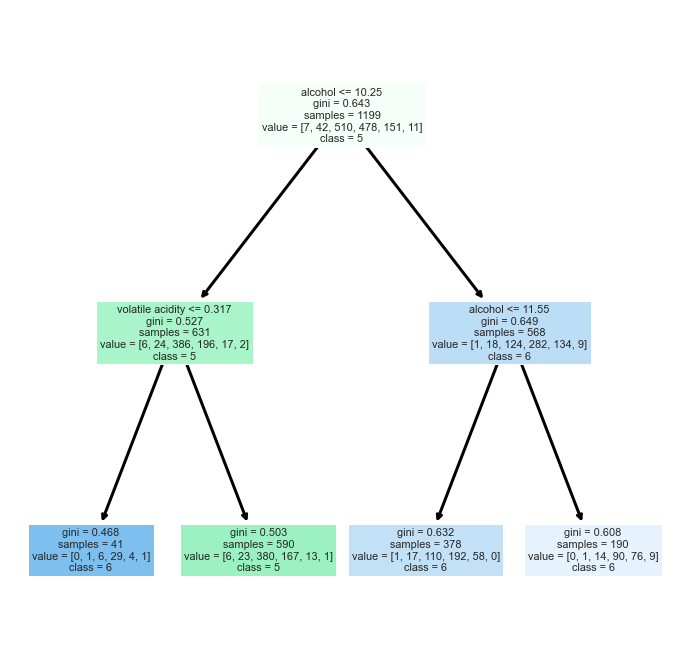

In [42]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()